# ****Netflix Movie Data EDA and Recommendation****

**Libraries**

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**About Netflix**

Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Original

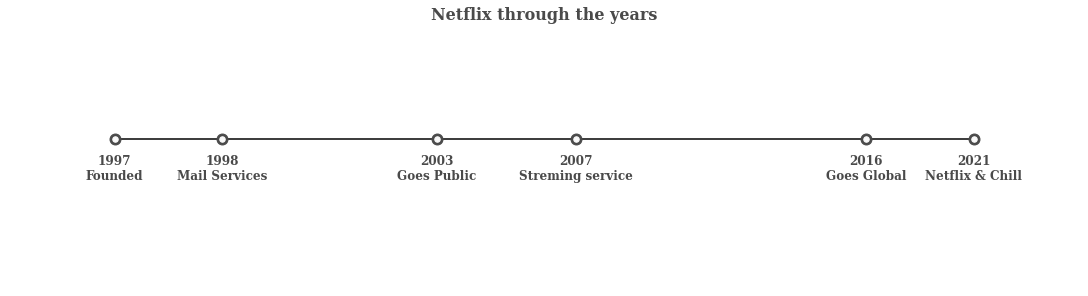

In [2]:
from datetime import datetime
tl_dates = [
    "1997\nFounded",
    "1998\nMail Services",
    "2003\nGoes Public",
    "2007\nStreming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]
tl_x = [1,2,4,5.3,8,9]


fig,ax = plt.subplots(figsize=(15,4),constrained_layout=True)
ax.set_ylim(-2,1.5)
ax.set_xlim(0,10)
ax.axhline(0, xmin=0.1, xmax=0.9,c="#000000",zorder=1)
ax.scatter(tl_x,np.zeros(len(tl_x)),s=120,c="#4a4a4a",zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
plt.show()

**About Netflix Dataset**

*Netflix Movies and TV Shows 2021*

This dataset is taken from Kaggle. It has 4284 entries entries and 17 columns.



In [3]:
#Load the dataset
df = pd.read_csv('netflixData.csv', encoding='ISO-8859-1')
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [4]:
#print(df.describe())
print("Summary of the basic information about this DataFrame and its data:")
print(df.info())

Summary of the basic information about this DataFrame and its data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB
None


**Data pre-processing**

*Investigating the missing data* 

In [5]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        

Director null rate: 34.59%
Cast null rate: 8.88%
Production Country null rate: 9.37%
Release Date null rate: 0.05%
Rating null rate: 0.07%
Duration null rate: 0.05%
Imdb Score null rate: 10.19%
Date Added null rate: 22.37%


In [6]:
df['Director'] = df['Director'].fillna(df['Director'].mode()[0])
df['Cast'].replace(np.nan,'No data',inplace=True)
df['Production Country'].replace(np.nan,'No data',inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df['Date Added'] = pd.to_datetime(df['Date Added'])
df['month_added'] = df['Date Added'].dt.month
df['month_name_added'] = df['Date Added'].dt.month_name()
df['year_added'] = df['Date Added'].dt.year
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,month_added,month_name_added,year_added
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,2020-09-08,9,September,2020
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,2020-07-01,7,July,2020
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",No data,Canada,2020.0,TV-14,90 min,5.1/10,Movie,2020-02-05,2,February,2020
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,2020-05-21,5,May,2020
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,2020-06-28,6,June,2020


**Netflix Content Type**

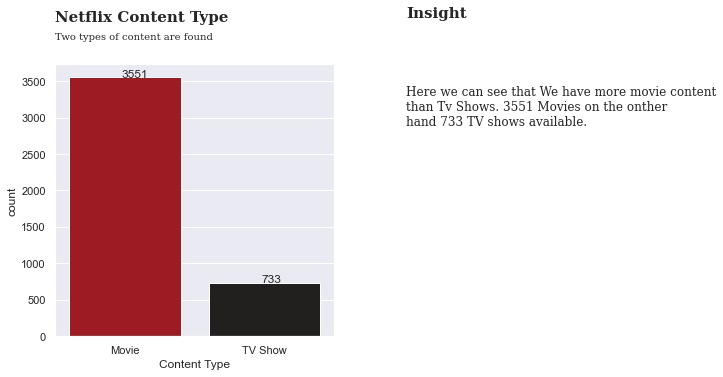

In [8]:
import warnings
warnings.simplefilter('ignore')
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(5, 5))
#Adding text
fig.text(0.125,1,'Netflix Content Type',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'Two types of content are found',fontsize=10,fontweight='light',fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Here we can see that We have more movie content
than Tv Shows. 3551 Movies on the onther
hand 733 TV shows available.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)
ax=plt.axes()

ax = sns.countplot(df["Content Type"], 
                   order = df["Content Type"].value_counts().index, palette=['#b20710',"#221f1f"])

for p, label in zip(ax.patches, df["Content Type"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.35))

In [9]:
x = df.groupby(['Content Type'])['Content Type'].count()
y = len(df)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T
mf_ratio.head()


Content Type,Movie,TV Show
Content Type,0.83,0.17


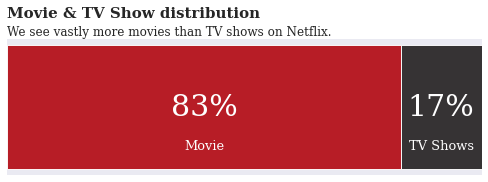

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])



for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')

    

fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()

**Netflix Content Production Country Information**

In [11]:
df['Production Country']

1                                 South Korea
2                                       Italy
4                                      Canada
5                                   Indonesia
6                                   Indonesia
                        ...                  
5960                                Australia
5961    United Kingdom, Canada, United States
5962                                    Egypt
5965                              South Korea
5966                                  No data
Name: Production Country, Length: 4284, dtype: object

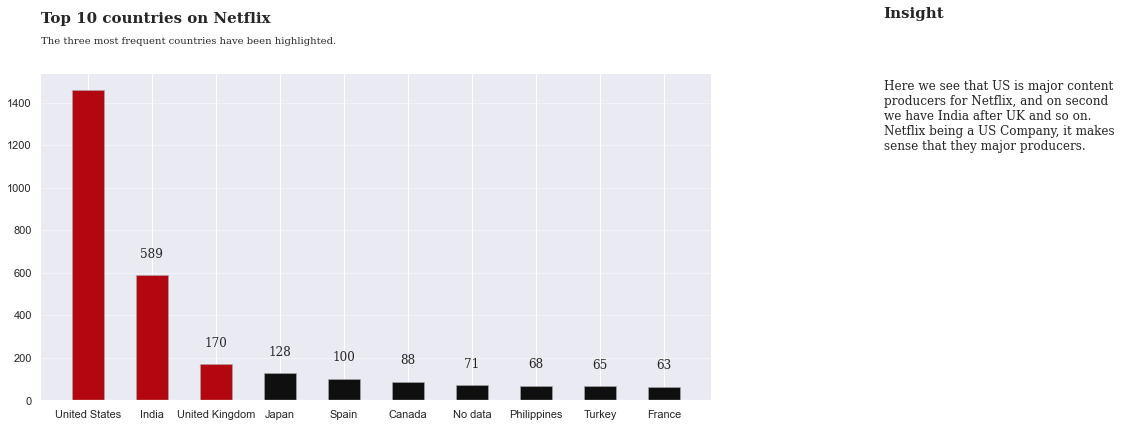

In [12]:
df['count']=1 #helper column
data = df.groupby('Production Country')['count'].sum().sort_values(ascending=False)[:10]


color_map = ['#0f0f0f' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))

#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
#Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Here we see that US is major content 
producers for Netflix, and on second
we have India after UK and so on.
Netflix being a US Company, it makes 
sense that they major producers.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)

# Netflix Recommendation System with Python

In [13]:
import pandas as pd
import numpy as np
import math
import re

from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
sns.set_style("darkgrid")
# Skip date
df1 = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df1['Rating'] = df1['Rating'].astype(float)
df = df1
df.index = np.arange(0,len(df))

Now let’s have a look at the spread of the dataset and the ratings of the people on Netflix movies:

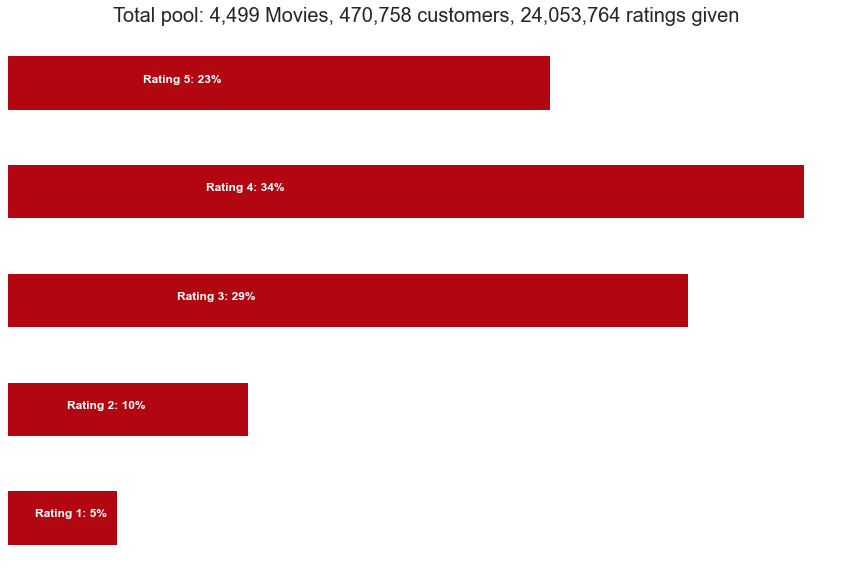

In [14]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False,color = '#b20710', figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count),
          fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]),
            color = 'white', weight = 'bold')

In [15]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

# remove those Movie ID rows
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764
-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [17]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Movie minimum times of review: 1799.0
Original Shape: (24053764, 3)
After Trim Shape: (17337458, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [18]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target = df_p[i]
    similar_to_target = df_p.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(df_movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))
   
recommend("What the #$*! Do We Know!?", 0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on Pearsons'R correlation - 
 PearsonR                                     Name  count     mean
 1.000000               What the #$*! Do We Know!?  14910 3.189805
 0.505500                                Inu-Yasha   1883 4.554434
 0.452807 Captain Pantoja and the Special Services   1801 3.417546
 0.442354                Without a Trace: Season 1   2124 3.980226
 0.384179                     Yu-Gi-Oh!: The Movie   3173 3.331547
 0.383959                                 Scorched   2430 2.894239
 0.381173  All Creatures Great and Small: Series 1   2327 3.938118
 0.381112          As Time Goes By: Series 1 and 2   2249 4.164073
 0.373018                         Cowboys & Angels   2368 3.589527
 0.371981                           Biggie & Tupac   1866 3.019293


Resource:
    https://plotly.com/
    
    https://www.analyticsvidhya.com/blog/2021/07/visualizing-netflix-data-using-python/
    
    https://thecleverprogrammer.com/2020/12/26/netflix-recommendation-system-with-python/#google_vignette